In [1]:
import pandas as pd

df = pd.read_csv("recarsales.csv")

In [2]:
print(df.columns)


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [3]:
relevant_columns = ['make', 'sellingprice', 'saledate']
df_relevant = df[relevant_columns]
# df_relevant.head(200)

In [4]:
df_relevant['saledate'] = pd.to_datetime(df_relevant['saledate'], utc = True)


C:\Users\John\AppData\Local\Temp\ipykernel_10936\1706510767.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_relevant['saledate'] = pd.to_datetime(df_relevant['saledate'], utc = True)
C:\Users\John\AppData\Local\Temp\ipykernel_10936\1706510767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['saledate'] = pd.to_datetime(df_relevant['saledate'], utc = True)


In [5]:
df_relevant.head(3)

,make,sellingprice,saledate
0,Kia,21500,2014-12-16 04:30:00+00:00
1,Kia,21500,2014-12-16 04:30:00+00:00
2,BMW,30000,2015-01-14 20:30:00+00:00


Aggregation

In [6]:
# Set the saledate column as the index
df_relevant.set_index('saledate', inplace=True)

In [7]:
# For forecasting total sales price per month:
sales_by_month = df_relevant['sellingprice'].resample('M').sum()

C:\Users\John\AppData\Local\Temp\ipykernel_10936\2940325140.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_by_month = df_relevant['sellingprice'].resample('M').sum()


visualizing the aggregated data

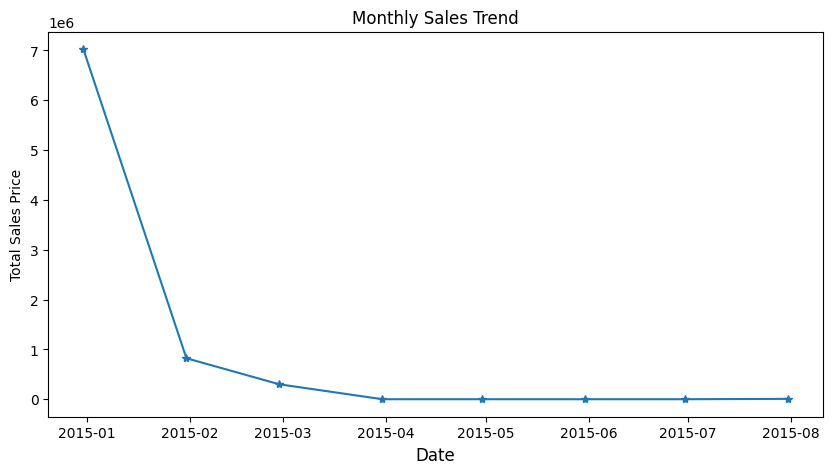

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(sales_by_month.index, sales_by_month, marker="*",fillstyle='full')
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Total Sales Price")
plt.title("Monthly Sales Trend")
plt.show()

FORECST USING ARMA

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
model = ARIMA(sales_by_month, order=(5,1,0)) 
model_fit = model.fit()

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predict
Forecast Future Values
You can use the forecast method of your fitted model. For example, to forecast the next 12 months:

In [11]:
forecast = model_fit.forecast(steps = 11)
print(forecast)

2015-08-31 00:00:00+00:00   -2.845609e+05
2015-09-30 00:00:00+00:00   -5.268481e+05
2015-10-31 00:00:00+00:00   -1.301050e+06
2015-11-30 00:00:00+00:00   -1.894678e+06
2015-12-31 00:00:00+00:00   -3.151973e+06
2016-01-31 00:00:00+00:00   -3.996477e+06
2016-02-29 00:00:00+00:00   -5.547178e+06
2016-03-31 00:00:00+00:00   -6.386682e+06
2016-04-30 00:00:00+00:00   -7.939241e+06
2016-05-31 00:00:00+00:00   -8.481865e+06
2016-06-30 00:00:00+00:00   -9.778855e+06
Freq: ME, Name: predicted_mean, dtype: float64


In [12]:
# Create a date range starting from the next month after the last date in your series
forecast_index = pd.date_range(start=sales_by_month.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')

C:\Users\John\AppData\Local\Temp\ipykernel_10936\3799197418.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_by_month.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')


In [13]:
forecast_series = pd.Series(forecast, index=forecast_index)

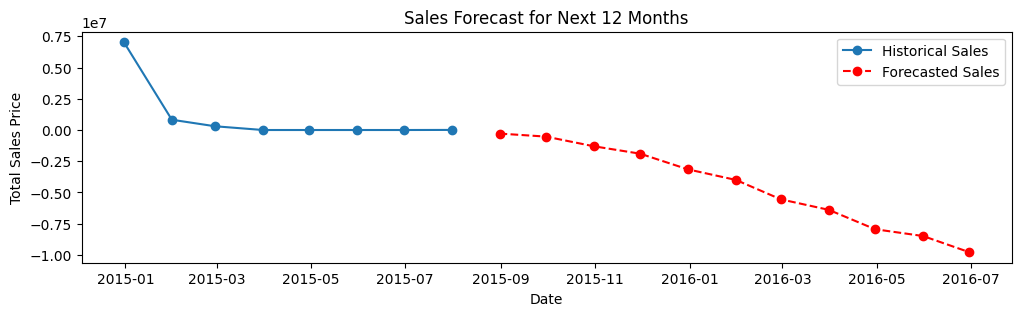

In [17]:

plt.figure(figsize=(12, 3))
plt.plot(sales_by_month.index, sales_by_month, label="Historical Sales", marker="o")
plt.plot(forecast_series.index, forecast_series, label="Forecasted Sales", linestyle="--", marker="o", color = 'red')
plt.xlabel("Date")
plt.ylabel("Total Sales Price")
plt.title("Sales Forecast for Next 12 Months")
plt.legend()
plt.show()


In [15]:
forecast_object = model_fit.get_forecast(steps=12)
forecast_ci = forecast_object.conf_int()

# Print the confidence intervals
print(forecast_ci)

                           lower sellingprice  upper sellingprice
2015-08-31 00:00:00+00:00       -2.849181e+05       -2.842038e+05
2015-09-30 00:00:00+00:00       -5.276076e+05       -5.260885e+05
2015-10-31 00:00:00+00:00       -1.302836e+06       -1.299265e+06
2015-11-30 00:00:00+00:00       -1.897641e+06       -1.891715e+06
2015-12-31 00:00:00+00:00       -3.156868e+06       -3.147078e+06
2016-01-31 00:00:00+00:00       -4.003441e+06       -3.989512e+06
2016-02-29 00:00:00+00:00       -5.556937e+06       -5.537418e+06
2016-03-31 00:00:00+00:00       -6.399231e+06       -6.374133e+06
2016-04-30 00:00:00+00:00       -7.955142e+06       -7.923340e+06
2016-05-31 00:00:00+00:00       -8.500894e+06       -8.462836e+06
2016-06-30 00:00:00+00:00       -9.801356e+06       -9.756353e+06
2016-07-31 00:00:00+00:00       -9.858467e+06       -9.807368e+06


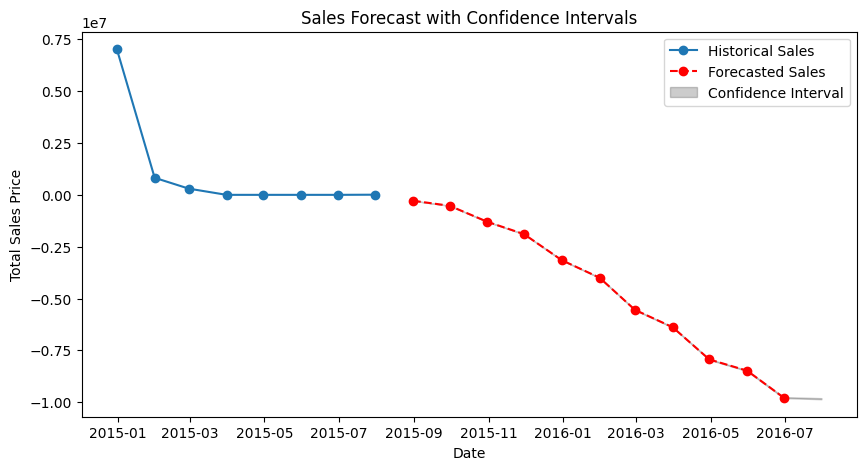

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(sales_by_month.index, sales_by_month, label="Historical Sales", marker="o")
plt.plot(forecast_series.index, forecast_series, label="Forecasted Sales", linestyle="--", marker="o", color = 'red')
plt.fill_between(forecast_series.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2, label='Confidence Interval')
plt.xlabel("Date")
plt.ylabel("Total Sales Price")
plt.title("Sales Forecast with Confidence Intervals")
plt.legend()
plt.show()